In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"




print("Please wait data laoding...")
data = pd.read_csv('mbti_1.csv')

# Text preprocessing steps - remove numbers, captial letters and punctuation
# remove url
def alphanumeric(x): return re.sub(r"""\w*\d\w*""", ' ', x)
def punc_lower(x): return re.sub('[%s]' % re.escape(string.punctuation),' ', x.lower())
def urlLink(x): return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b',' ', x)

data['posts'] = data.posts.map(urlLink).map(alphanumeric).map(punc_lower)


# split the data into feature and label
posts = data.posts  # inputs into model
types = data.type  # output of model

#random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    posts, types, test_size=0.2,random_state=42)


#apply nltk stopword
#stopwords.words('english')

#apply default stopword
#stop_words='english'

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



#print("TRAINING SET")
#print("Accuracy: ", modelLoad.score(X_train_tfidf, y_train))
#print("Confusion Matrix:")
#print(confusion_matrix(y_train, modelLoad.predict(X_train_tfidf)))
#print("Classification Report:")
#print(classification_report(y_train, modelLoad.predict(X_train_tfidf)))



#strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
#score=mlp.score(X_test_tfidf, y_test)
#precision= np.mean(cross_val_score(MLPClassifier(), X_test_tfidf, y_test, cv=strat_k_fold, scoring='precision_weighted', n_jobs=-1))
#accuracy= np.mean(cross_val_score(MLPClassifier(), X_test_tfidf, y_test, cv=strat_k_fold, scoring='accuracy', n_jobs=-1))
#print(score)
#print(accuracy)
#print(precision)
#print("")





Please wait data laoding...


In [5]:
def show_result():
    print("TEST SET")
    print("Accuracy: ", modelLoad.score(X_test_tfidf, y_test))
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, modelLoad.predict(X_test_tfidf)))
    print("Classification Report:")
    print(classification_report(y_test, modelLoad.predict(X_test_tfidf)))

    cm_TestSet = np.array(confusion_matrix(y_test, modelLoad.predict(X_test_tfidf)))
    cm_TestSetDF = pd.DataFrame(cm_TestSet, index=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP',
                                        'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP',
                                        'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                                columns=['predict_ENFJ','predict_ENFP','predict_ENTJ',
                                        'predict_ENTP','predict_ESFJ','predict_ESFP',
                                        'predict_ESTJ','predict_ESTP','predict_INFJ',
                                        'predict_INFP','predict_INTJ','predict_INTP',
                                        'predict_ISFJ','predict_ISFP','predict_ISTJ',
                                        'predict_ISTP'])

    fig, ax = plt.subplots(figsize=(14,10)) 
    plt.title('Confusion Matrix for MLP Classifier Test Set', fontsize=16,
            fontweight='bold', y=1.02)
    sns.heatmap(cm_TestSetDF, robust=True, annot=True, linewidth=0.5, 
                fmt='', cmap='RdBu_r', vmax=303, ax=ax)
    plt.xticks(fontsize=12)
    plt.yticks(rotation=0, fontsize=12)



---Training Time 45.01 minutes ---
---Hidden Layer 80 with solver=adam, activation=logistic, NLTK stopword---

TEST SET
Accuracy:  0.6622478386167147
Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.65      0.37      0.47        41
        ENFP       0.66      0.66      0.66       125
        ENTJ       0.65      0.45      0.53        44
        ENTP       0.66      0.61      0.63       135
        ESFJ       1.00      0.14      0.25         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.75      0.43      0.55         7
        ESTP       0.75      0.40      0.52        15
        INFJ       0.65      0.66      0.65       288
        INFP       0.66      0.79      0.72       370
        INTJ       0.62      0.66      0.64       193
        INTP       0.68      0.79      0.73       293
        ISFJ       0.93      0.56      0.69        45
        ISFP       0.63      0.45      0.53        53
        ISTJ    

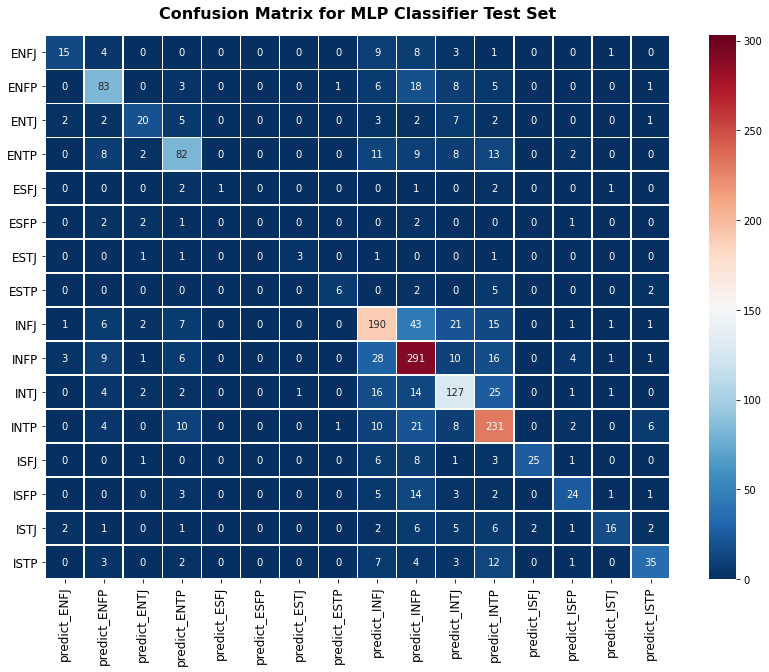

In [6]:
#adam
start_time = time.time()

mlp = MLPClassifier(solver='adam', activation='logistic', hidden_layer_sizes=(80), max_iter=1000)

mlp.fit(X_train_tfidf, y_train)

minutes=(time.time() - start_time)/60
print("---Training Time %0.2f minutes ---" %minutes)
print("---Hidden Layer 80 with solver=adam, activation=logistic, NLTK stopword---")
print("")

joblib.dump(filename='MLP_ADAM',value=mlp)
modelLoad = joblib.load(filename="MLP_ADAM")
show_result()

---Training Time 2.21 minutes ---
---Hidden Layer 80 with solver=lbfgs, activation=logistic, NLTK stopword---

TEST SET
Accuracy:  0.6409221902017291
Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.59      0.24      0.34        41
        ENFP       0.61      0.63      0.62       125
        ENTJ       0.79      0.43      0.56        44
        ENTP       0.61      0.53      0.57       135
        ESFJ       0.43      0.43      0.43         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.12      0.29      0.17         7
        ESTP       0.86      0.40      0.55        15
        INFJ       0.64      0.65      0.64       288
        INFP       0.66      0.77      0.71       370
        INTJ       0.58      0.70      0.64       193
        INTP       0.68      0.75      0.72       293
        ISFJ       0.96      0.49      0.65        45
        ISFP       0.59      0.51      0.55        53
        ISTJ    

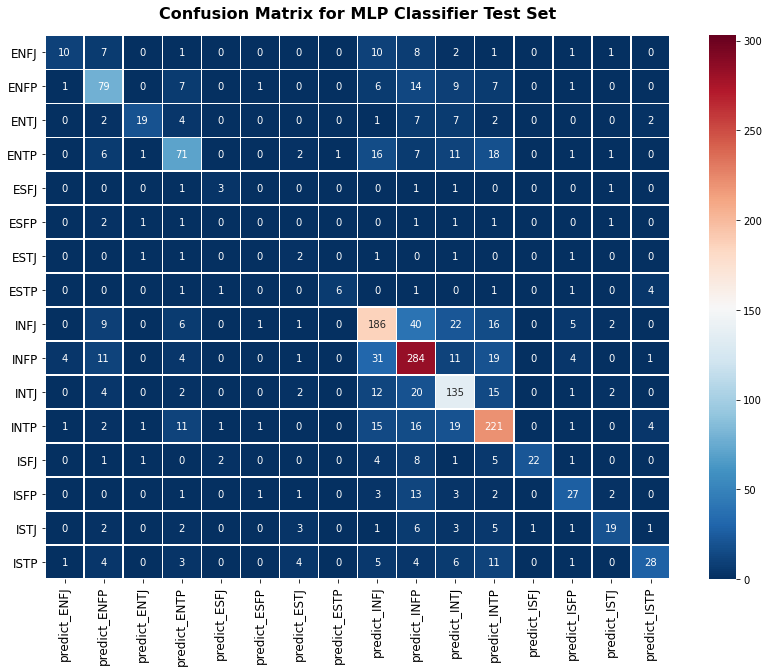

In [7]:
#lbfgs   
start_time = time.time()

mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(80), max_iter=1000)

mlp.fit(X_train_tfidf, y_train)

minutes=(time.time() - start_time)/60
print("---Training Time %0.2f minutes ---" %minutes)
print("---Hidden Layer 80 with solver=lbfgs, activation=logistic, NLTK stopword---")
print("")

joblib.dump(filename='MLP_LBFGS',value=mlp)
modelLoad = joblib.load(filename="MLP_LBFGS")
show_result()